# Model Visualization


In [67]:
%matplotlib inline
import copy
from itertools import product
import time
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mdp_lib.domains.gridworld import GridWorld
from planninginbeliefmodel import PlanningInObserverBeliefModel
from mdp_lib.domains.gridworldvis import visualize_trajectory, plot_text
from task import mdp_codes, mdp_params
from mdp_lib.util import sample_prob_dict
from util import mdp_to_feature_belief

#model_obs_judgments = pd.read_pickle('./cached_values/model_obs_judgments.pkl')
#model_obs_judgments = pd.read_pickle('./cached_values/model_.pkl')
model_obs_judgments = pd.read_pickle('./cached_values/human_results.pkl')

# Plotting Doing (top row) versus Showing (bottom row) demonstrations

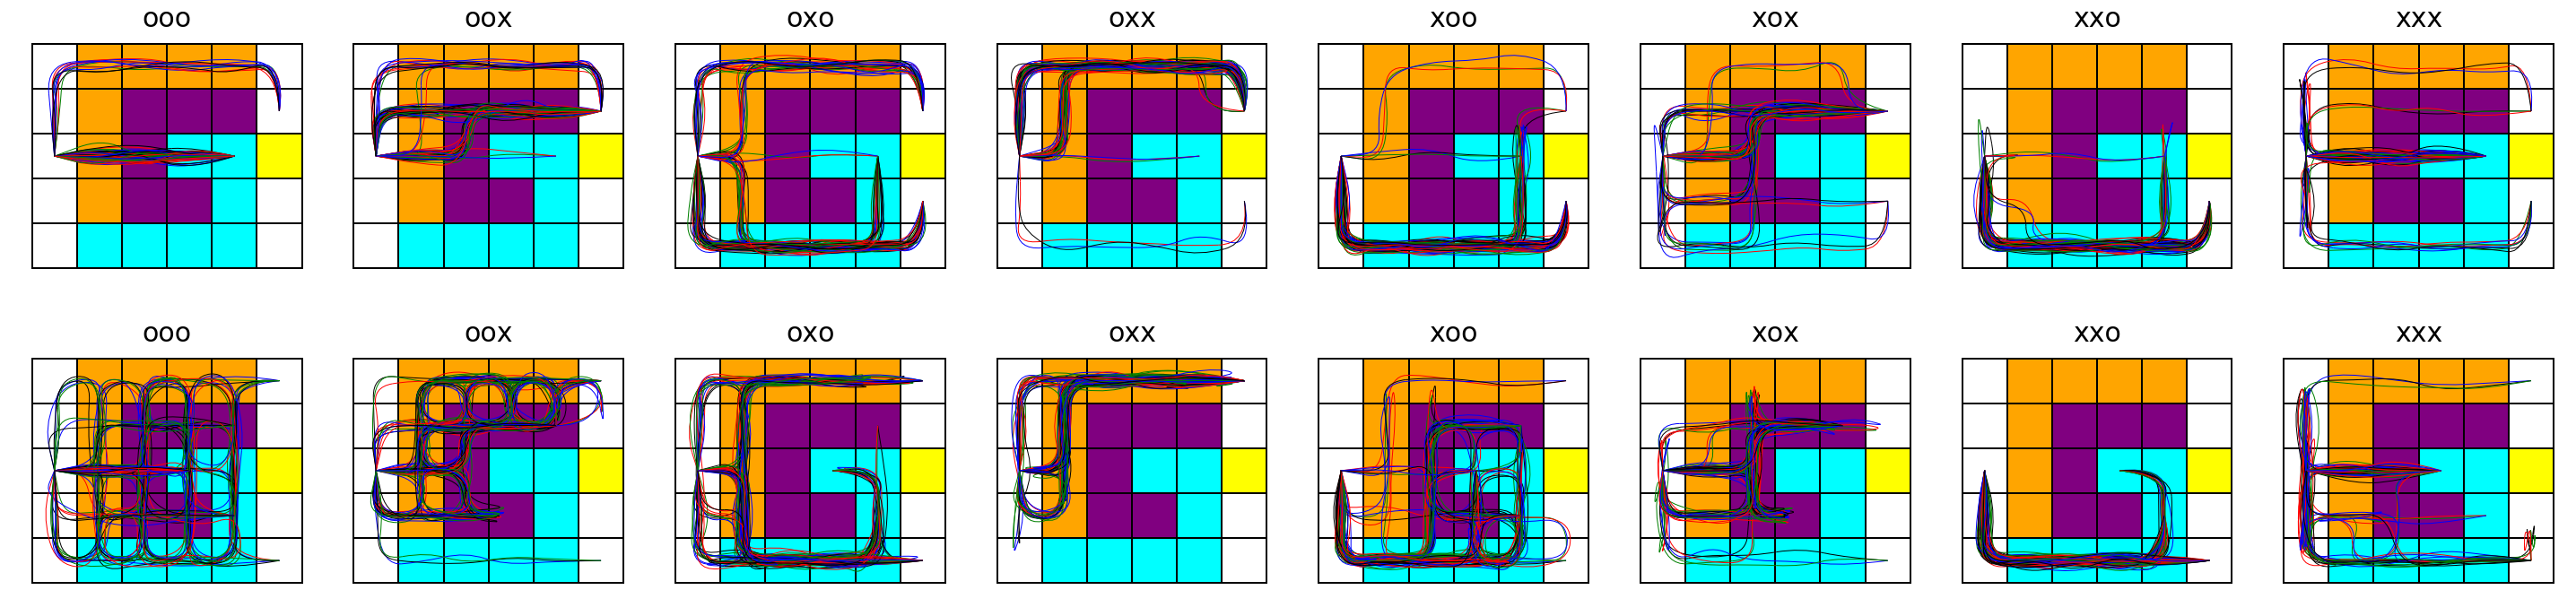

In [70]:
fig, axes = plt.subplots(2, 8, figsize=(40, 10))

only_obs_judg = model_obs_judgments[model_obs_judgments['observer'] == 'naive']
gw = GridWorld(**mdp_params[0])

colors = ['r','b','k','g']
for (dtype, rf), block in only_obs_judg.groupby(['demonstrator', 'rf']):
    ax = axes[['doing', 'showing'].index(dtype)][mdp_codes.index(rf)]
    gw.plot(ax=ax, feature_colors={'o':'orange', 'p':'purple', 'c':'cyan'})
    
    ti = 0
    for _, row in block.iterrows():
        if row['demonstrator'] == 'showing':
            traj = row['traj'][:-1]
        else:
            traj = row['traj']
        visualize_trajectory(axis=ax, traj=traj, 
                             color=colors[ti % len(colors)])
        ti += 1
    ax.set_title(rf, fontsize=30)
plt.tight_layout()

In [20]:
print(model_obs_judgments)

      demonstrator   rf       observer  \
0            doing  ooo          naive   
1            doing  ooo  sophisticated   
2            doing  ooo          naive   
3            doing  ooo  sophisticated   
4            doing  ooo          naive   
5            doing  ooo  sophisticated   
6            doing  ooo          naive   
7            doing  ooo  sophisticated   
8            doing  ooo          naive   
9            doing  ooo  sophisticated   
10           doing  ooo          naive   
11           doing  ooo  sophisticated   
12           doing  ooo          naive   
13           doing  ooo  sophisticated   
14           doing  ooo          naive   
15           doing  ooo  sophisticated   
16           doing  ooo          naive   
17           doing  ooo  sophisticated   
18           doing  ooo          naive   
19           doing  ooo  sophisticated   
20           doing  ooo          naive   
21           doing  ooo  sophisticated   
22           doing  ooo          n

# Demonstrator x Observer Correct Probability
This figure plots amount of probablity mass placed on the correct reward for a color (e.g. safe or dangerous) for each of the demonstrator and observer combinations.

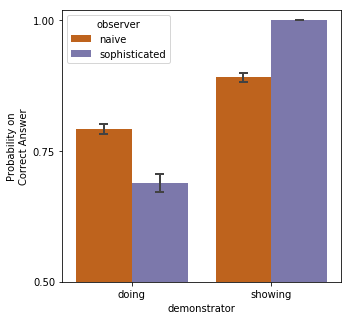

In [62]:
fig, ax = plt.subplots(figsize=(5, 5))
g = sns.barplot(data=model_obs_judgments,
                y='correct_prob', x='demonstrator',
                order=['doing', 'showing'],
                hue='observer', hue_order=['naive', 'sophisticated'],
                palette=sns.color_palette("Dark2")[1:],
                capsize=.05, errwidth=2, ax=ax)
plt.ylim(.5, 1.02)
g.set(yticks=[.5, .75, 1.0])
_ = ax.set_ylabel('Probability on\nCorrect Answer')

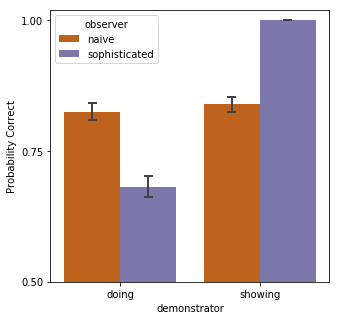

In [63]:
fig, ax = plt.subplots(figsize=(5, 5))
g = sns.barplot(data=model_obs_judgments,
                y='correct', x='demonstrator',
                order=['doing', 'showing'],
                hue='observer', hue_order=['naive', 'sophisticated'],
                palette=sns.color_palette("Dark2")[1:],
                capsize=.05, errwidth=2, ax=ax)
plt.ylim(.5, 1.02)
g.set(yticks=[.5, .75, 1.0])
_ = ax.set_ylabel('Probability Correct')

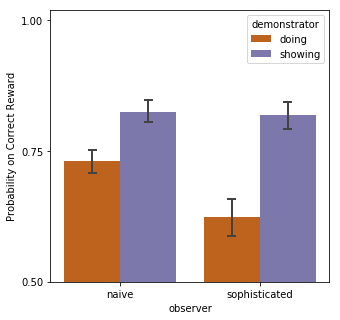

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))
g = sns.barplot(data=model_obs_judgments,
                y='correct_prob', x='observer',
                order=['naive', 'sophisticated'],
                hue='demonstrator', hue_order=['doing', 'showing'],
                palette=sns.color_palette("Dark2")[1:],
                capsize=.05, errwidth=2, ax=ax)
plt.ylim(.5, 1.02)
g.set(yticks=[.5, .75, 1.0])
_ = ax.set_ylabel('Probability on Correct Reward')

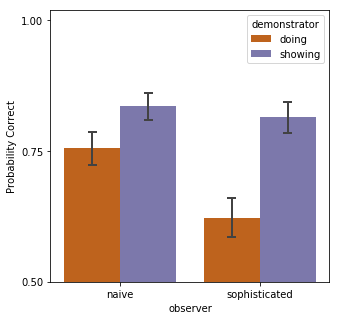

In [69]:
fig, ax = plt.subplots(figsize=(5, 5))
g = sns.barplot(data=model_obs_judgments,
                y='correct', x='observer',
                order=['naive', 'sophisticated'],
                hue='demonstrator', hue_order=['doing', 'showing'],
                palette=sns.color_palette("Dark2")[1:],
                capsize=.05, errwidth=2, ax=ax)
plt.ylim(.5, 1.02)
g.set(yticks=[.5, .75, 1.0])
_ = ax.set_ylabel('Probability Correct')

# Beliefs over time
This plot compares the evolution of beliefs over time between the two observer interpretation models.

In [7]:
plot_rf = 'oox'
plot_demonstrator = 'doing'
plot_i = 0

In [8]:
belief_trajs = model_obs_judgments[['demonstrator', 'rf', 'traj',
                                    'observer', 'belief_traj', ]]
belief_trajs.traj = belief_trajs.traj.apply(tuple)
belief_trajs = belief_trajs.drop_duplicates(['demonstrator', 'rf', 'traj', 'observer'])
traj_block = belief_trajs[(belief_trajs.rf == plot_rf) & 
                          (belief_trajs.demonstrator == plot_demonstrator)]
wtraj = traj_block.traj.iloc[0]
traj_block = traj_block[traj_block.traj == wtraj]
obs_b = traj_block[traj_block.observer == 'naive'].iloc[plot_i]['belief_traj']
sobs_b = traj_block[traj_block.observer == 'sophisticated'].iloc[plot_i]['belief_traj']

forder = ['orange', 'purple', 'cyan']
obs_b = pd.DataFrame([mdp_to_feature_belief(b, mdp_codes, forder) for b in obs_b])
obs_b['step'] = obs_b.index
obs_b['observer'] = 'naive'
sobs_b = pd.DataFrame([mdp_to_feature_belief(b, mdp_codes, forder) for b in sobs_b])
sobs_b['step'] = sobs_b.index
sobs_b['observer'] = 'sophisticated'

b_trajs = pd.concat([obs_b, sobs_b])
b_trajs = pd.melt(b_trajs, id_vars=['step', 'observer'], 
                  value_vars=['cyan', 'orange', 'purple'],
                  value_name='exp_safe', var_name='color')

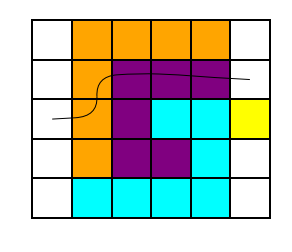

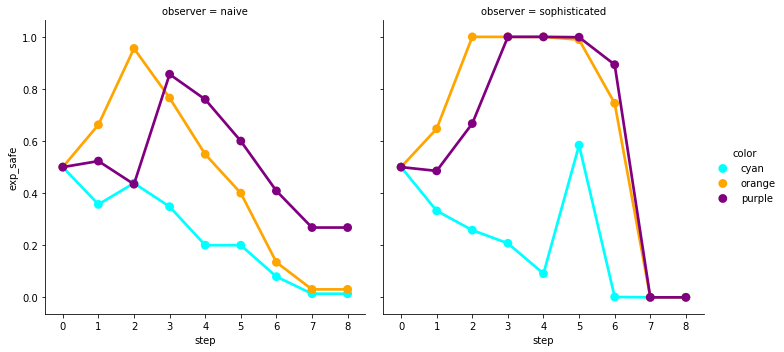

In [9]:
ax = gw.plot(feature_colors={'o': 'orange', 'p': 'purple', 'c': 'cyan'})
visualize_trajectory(axis=ax, traj=wtraj[:-1])
sns.factorplot(data=b_trajs, x='step', y='exp_safe',
               hue='color', 
               palette={'cyan':'cyan', 'orange':'orange', 'purple':'purple'},
               col='observer', col_order=['naive', 'sophisticated'])